# Movie Recommendation system using Item based collaborative filtering #

In [76]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Data loading and preprocessing**

In [77]:
#Importing data - movie titles
movie_titles_df = pd.read_csv('Movie_Id_Titles')

In [78]:
movie_titles_df.head(100)

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)
...,...,...
95,96,Terminator 2: Judgment Day (1991)
96,97,Dances with Wolves (1990)
97,98,"Silence of the Lambs, The (1991)"
98,99,Snow White and the Seven Dwarfs (1937)


In [79]:
#Importing data - movie ratings
movie_ratings_df = pd.read_csv('u.data', sep='\t', names=['user_id', 'item_id', 'rating', 'timestamp'])

In [80]:
movie_ratings_df.head(100)

,user_id,item_id,rating,timestamp
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949
4,186,302,3,891717742
...,...,...,...,...
95,87,1016,4,879876194
96,279,154,5,875296291
97,145,275,2,885557505
98,119,1153,5,874781198


In [81]:
movie_ratings_df.drop(['timestamp'], axis=1, inplace=True) #dropping timestamp column

In [82]:
movie_ratings_df.head()

,user_id,item_id,rating
0,0,50,5
1,0,172,5
2,0,133,1
3,196,242,3
4,186,302,3


In [83]:
movie_ratings_df.describe()

,user_id,item_id,rating
count,100003.000000,100003.000000,100003.000000
mean,462.470876,425.520914,3.529864
std,266.622454,330.797791,1.125704
min,0.000000,1.000000,1.000000
25%,254.000000,175.000000,3.000000
50%,447.000000,322.000000,4.000000
75%,682.000000,631.000000,4.000000
max,943.000000,1682.000000,5.000000


In [84]:
movie_ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100003 entries, 0 to 100002
Data columns (total 3 columns):
 #   Column   Non-Null Count   Dtype
---  ------   --------------   -----
 0   user_id  100003 non-null  int64
 1   item_id  100003 non-null  int64
 2   rating   100003 non-null  int64
dtypes: int64(3)
memory usage: 2.3 MB


In [85]:
movies_ratings_df = pd.merge(movie_ratings_df, movie_titles_df, on='item_id') #merging the two dataframes on item_id
movies_ratings_df

,user_id,item_id,rating,title
0,0,50,5,Star Wars (1977)
1,0,172,5,"Empire Strikes Back, The (1980)"
2,0,133,1,Gone with the Wind (1939)
3,196,242,3,Kolya (1996)
4,186,302,3,L.A. Confidential (1997)
...,...,...,...,...
99998,880,476,3,"First Wives Club, The (1996)"
99999,716,204,5,Back to the Future (1985)
100000,276,1090,1,Sliver (1993)
100001,13,225,2,101 Dalmatians (1996)


In [86]:
movies_ratings_df.shape

(100003, 4)

In [87]:
#Get how many ratings each movie has
movies_ratings_df.groupby('title')['rating'].describe()

,count,mean,std,min,25%,50%,75%,max
title,,,,,,,,
'Til There Was You (1997),9.0,2.333333,1.000000,1.0,2.00,2.0,3.0,4.0
1-900 (1994),5.0,2.600000,1.516575,1.0,1.00,3.0,4.0,4.0
101 Dalmatians (1996),109.0,2.908257,1.076184,1.0,2.00,3.0,4.0,5.0
12 Angry Men (1957),125.0,4.344000,0.719588,2.0,4.00,4.0,5.0,5.0
187 (1997),41.0,3.024390,1.172344,1.0,2.00,3.0,4.0,5.0
...,...,...,...,...,...,...,...,...
Young Guns II (1990),44.0,2.772727,1.008421,1.0,2.00,3.0,3.0,5.0
"Young Poisoner's Handbook, The (1995)",41.0,3.341463,1.237129,1.0,3.00,4.0,4.0,5.0
Zeus and Roxanne (1997),6.0,2.166667,0.983192,1.0,1.25,2.5,3.0,3.0


In [88]:
#Get the mean and count of the ratings
ratings_df_mean = movies_ratings_df.groupby('title')['rating'].describe()['mean']
ratings_df_count = movies_ratings_df.groupby('title')['rating'].describe()['count']

In [89]:
ratings_df_count

title
'Til There Was You (1997)                  9.0
1-900 (1994)                               5.0
101 Dalmatians (1996)                    109.0
12 Angry Men (1957)                      125.0
187 (1997)                                41.0
                                         ...  
Young Guns II (1990)                      44.0
Young Poisoner's Handbook, The (1995)     41.0
Zeus and Roxanne (1997)                    6.0
unknown                                    9.0
Á köldum klaka (Cold Fever) (1994)         1.0
Name: count, Length: 1664, dtype: float64

In [90]:
#concatinating the mean and count of the ratings
rating_df_mean_count = pd.concat([ratings_df_count, ratings_df_mean], axis=1)

In [91]:
#resetting the index
rating_df_mean_count = rating_df_mean_count.reset_index()
rating_df_mean_count

,title,count,mean
0,'Til There Was You (1997),9.0,2.333333
1,1-900 (1994),5.0,2.600000
2,101 Dalmatians (1996),109.0,2.908257
3,12 Angry Men (1957),125.0,4.344000
4,187 (1997),41.0,3.024390
...,...,...,...
1659,Young Guns II (1990),44.0,2.772727
1660,"Young Poisoner's Handbook, The (1995)",41.0,3.341463
1661,Zeus and Roxanne (1997),6.0,2.166667
1662,unknown,9.0,3.444444


<Axes: ylabel='Frequency'>

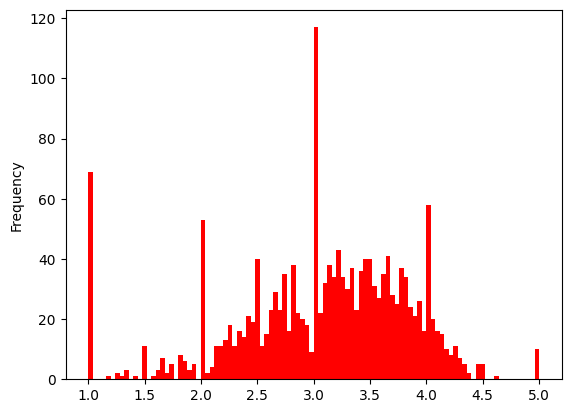

In [92]:
# Distribution of average movie ratings
rating_df_mean_count['mean'].plot(bins=100, kind='hist', color='r')

<Axes: ylabel='Frequency'>

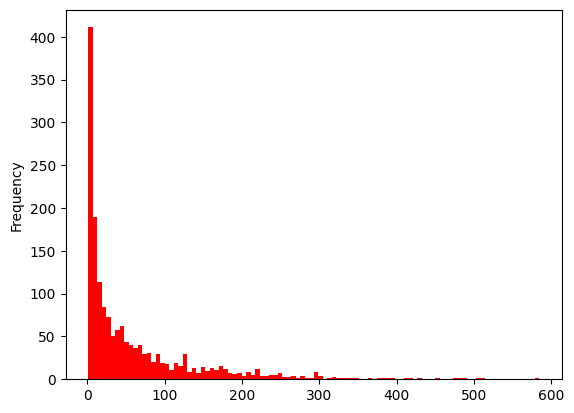

In [93]:
# The number of ratings each movie got
rating_df_mean_count['count'].plot(bins=100, kind='hist', color='r')

In [94]:
# The average rating of each movie with rating equal to 5
rating_df_mean_count[rating_df_mean_count['mean'] == 5]

,title,count,mean
30,Aiqing wansui (1994),1.0,5.0
462,Entertaining Angels: The Dorothy Day Story (1996),1.0,5.0
633,"Great Day in Harlem, A (1994)",1.0,5.0
944,Marlene Dietrich: Shadow and Light (1996),1.0,5.0
1172,Prefontaine (1997),3.0,5.0
1273,"Saint of Fort Washington, The (1993)",2.0,5.0
1277,Santa with Muscles (1996),2.0,5.0
1359,Someone Else's America (1995),1.0,5.0
1387,Star Kid (1997),3.0,5.0
1472,They Made Me a Criminal (1939),1.0,5.0


In [95]:
# Get the movies with the highest number of ratings
rating_df_mean_count.sort_values('count', ascending=False).head(100)

,title,count,mean
1398,Star Wars (1977),584.0,4.359589
333,Contact (1997),509.0,3.803536
498,Fargo (1996),508.0,4.155512
1234,Return of the Jedi (1983),507.0,4.007890
860,Liar Liar (1997),485.0,3.156701
...,...,...,...
36,Aladdin (1992),219.0,3.812785
109,Babe (1995),219.0,3.995434
1588,Volcano (1997),219.0,2.808219
1507,To Kill a Mockingbird (1962),219.0,4.292237


In [96]:
# Get the movies with the lowest number of ratings
rating_df_mean_count.sort_values('count', ascending=True).head(200)

,title,count,mean
1663,Á köldum klaka (Cold Fever) (1994),1.0,3.0
980,Mille bolle blu (1993),1.0,1.0
951,Mat' i syn (1997),1.0,1.0
944,Marlene Dietrich: Shadow and Light (1996),1.0,5.0
931,"Man from Down Under, The (1943)",1.0,1.0
...,...,...,...
1327,"Show, The (1995)",2.0,3.0
963,Men With Guns (1997),2.0,3.5
137,"Beans of Egypt, Maine, The (1994)",2.0,3.5
163,Beyond Bedlam (1993),2.0,1.0


**Perform Item based collaborative filtering**

In [97]:
#Create a 2_D matrix of user_id and movie titles with ratings as the values
user_movie_ratings = movies_ratings_df.pivot_table(index='user_id', columns='title', values='rating')
user_movie_ratings

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
939,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
940,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
941,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


This 2d matrix has all the movie titles as rows and all the users as columns. The NaN fields represent the movies that are not rated by the users

In [98]:
#Get the ratings of the movie 'Titanic (1997)'
titanic_ratings = user_movie_ratings['Titanic (1997)']
titanic_ratings

user_id
0      NaN
1      NaN
2      5.0
3      NaN
4      NaN
      ... 
939    NaN
940    5.0
941    NaN
942    3.0
943    NaN
Name: Titanic (1997), Length: 944, dtype: float64

In [104]:
# Find the correlation of the movei 'Star Wars (1977)' with the all the other movies
movies_like_titanic = pd.DataFrame(
    user_movie_ratings.corrwith(titanic_ratings), columns=["Correlation"]
)
movies_like_titanic.reset_index(inplace=True)

C:\Users\subin\AppData\Roaming\Python\Python311\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\subin\AppData\Roaming\Python\Python311\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
C:\Users\subin\AppData\Roaming\Python\Python311\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
C:\Users\subin\AppData\Roaming\Python\Python311\site-packages\numpy\lib\function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
C:\Users\subin\AppData\Roaming\Python\Python311\site-packages\numpy\lib\function_base.py:2855: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


In [105]:
#Join the ratings with the movies like 'Star Wars (1977)'
movies_like_titanic = movies_like_titanic.join(rating_df_mean_count['count'])
movies_like_titanic

,title,Correlation,count
0,'Til There Was You (1997),-0.062017,9.0
1,1-900 (1994),NaN,5.0
2,101 Dalmatians (1996),0.120113,109.0
3,12 Angry Men (1957),0.077700,125.0
4,187 (1997),0.315654,41.0
...,...,...,...
1659,Young Guns II (1990),0.317274,44.0
1660,"Young Poisoner's Handbook, The (1995)",0.356783,41.0
1661,Zeus and Roxanne (1997),NaN,6.0
1662,unknown,NaN,9.0


In [106]:
#Drop the movies without any correlation
movies_like_titanic.dropna(inplace=True)
movies_like_titanic

,title,Correlation,count
0,'Til There Was You (1997),-0.062017,9.0
2,101 Dalmatians (1996),0.120113,109.0
3,12 Angry Men (1957),0.077700,125.0
4,187 (1997),0.315654,41.0
5,2 Days in the Valley (1996),0.017295,93.0
...,...,...,...
1655,Year of the Horse (1997),1.000000,7.0
1657,Young Frankenstein (1974),0.107666,200.0
1658,Young Guns (1988),0.199931,101.0
1659,Young Guns II (1990),0.317274,44.0


In [108]:
#Get the movies with the highest correlation with 'Titanic (1997)'
movies_like_titanic.sort_values('Correlation', ascending=False)

,title,Correlation,count
1038,Nadja (1994),1.0,8.0
1140,"Pest, The (1997)",1.0,8.0
1278,"Savage Nights (Nuits fauves, Les) (1992)",1.0,3.0
541,For Ever Mozart (1996),1.0,3.0
779,"Jerky Boys, The (1994)",1.0,3.0
...,...,...,...
1130,Pather Panchali (1955),-1.0,8.0
72,Angel Baby (1995),-1.0,4.0
189,Blood Beach (1981),-1.0,6.0
1548,Two Bits (1995),-1.0,5.0


In [109]:
#Only find the correlation of movies with more than 80 ratings
movies_like_titanic[movies_like_titanic['count'] > 80].sort_values('Correlation', ascending=False)

,title,Correlation,count
1500,Titanic (1997),1.000000,350.0
1244,"River Wild, The (1994)",0.497600,146.0
16,"Abyss, The (1989)",0.472103,151.0
223,Bram Stoker's Dracula (1992),0.443560,120.0
1533,True Lies (1994),0.435104,208.0
...,...,...,...
226,Brazil (1985),-0.243532,208.0
1238,Richard III (1995),-0.275451,89.0
321,Cold Comfort Farm (1995),-0.307150,125.0
1558,"Unbearable Lightness of Being, The (1988)",-0.314476,92.0


This correlation shows the most similar movies with respect to only the movie Titanic (1997)

We have to create a system which considers the ratings of a user and then suggest movies according to that. The input ratings are taken from an excel sheet here

In [110]:
#reading the input ratings
my_ratings = pd.read_csv('My_Ratings.csv')  
my_ratings

,Movie Name,Ratings
0,Titanic (1997),5
1,Star Wars (1977),4
2,101 Dalmatians (1996),1


In [112]:
#Find all the movie correlations
movie_correlations = user_movie_ratings.corr(method='pearson', min_periods=80)
movie_correlations

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
title,,,,,,,,,,,,,,,,,,,,,
'Til There Was You (1997),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1-900 (1994),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
101 Dalmatians (1996),NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12 Angry Men (1957),NaN,NaN,NaN,1.0,NaN,NaN,NaN,0.178848,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
187 (1997),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Young Guns II (1990),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"Young Poisoner's Handbook, The (1995)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Zeus and Roxanne (1997),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [121]:
#movie recommendation system
similar_movies_list = pd.Series()
for i in range(0, len(my_ratings)):
    similar_movie = movie_correlations[my_ratings['Movie Name'][i]].dropna() # Get same movies with same name
    similar_movie = similar_movie.map(lambda x: x * my_ratings['Ratings'][i]) # Scale the similarity by your given ratings
    similar_movies_list = similar_movies_list._append(similar_movie) # Add the score to the list

C:\Users\subin\AppData\Local\Temp\ipykernel_12596\1933566284.py:6: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  similar_movies_list = similar_movies_list._append(similar_movie) # Add the score to the list


In [123]:
similar_movies_list.sort_values(inplace = True, ascending = False)
similar_movies_list.head(20)

Titanic (1997)                               5.000000
Star Wars (1977)                             4.000000
Empire Strikes Back, The (1980)              2.993410
Return of the Jedi (1983)                    2.690223
True Lies (1994)                             2.175520
Raiders of the Lost Ark (1981)               2.144468
Die Hard (1988)                              2.015619
Air Force One (1997)                         1.918650
Jurassic Park (1993)                         1.913923
E.T. the Extra-Terrestrial (1982)            1.866007
Eraser (1996)                                1.855698
Twister (1996)                               1.811483
Dante's Peak (1997)                          1.786130
Braveheart (1995)                            1.783823
G.I. Jane (1997)                             1.735927
Raiders of the Lost Ark (1981)               1.688123
Indiana Jones and the Last Crusade (1989)    1.685198
Field of Dreams (1989)                       1.636794
Speed (1994)                

The movies list gives similar movies based on our input ratings